In [14]:
############################################################################### DEEP LEARNING PREDICTION ######################################################################################
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Dense, LSTM
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

def normalisation(train,test):
  train=sc.fit_transform(train)
  test=sc.fit_transform(test)
  return train,test


In [22]:
train= pd.read_csv(r"churn-bigml-80.csv")
test=train=pd.read_csv("churn-bigml-20.csv")
 

In [23]:
data=train.copy()
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [18]:
data.shape
 

(2666, 20)

In [ ]:
# Le target à prédire est: Churn



In [ ]:
# Dimensions du data_set
data.shape

(2666, 20)

In [ ]:
#info gene
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
# Variables discretes et variables catégorielles 
data.dtypes.value_counts()
# 8 eniers, 8 reels, 3 variables catégorielles, 1 variable Booleenne

int64      8
float64    8
object     3
bool       1
dtype: int64

In [ ]:
#Statistiques générales
data.describe()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
# écart quadratique
ecart_quadratique=data.var()

In [ ]:
ecart_quadratique

Account length            1565.308011
Area code                 1808.036973
Number vmail messages      185.294086
Total day minutes         2938.762071
Total day calls            399.526628
Total day charge            84.929733
Total eve minutes         2596.056893
Total eve calls            406.483869
Total eve charge            18.756385
Total night minutes       2578.641241
Total night calls          377.076533
Total night charge           5.221771
Total intl minutes           7.774888
Total intl calls             6.032893
Total intl charge            0.566726
Customer service calls       1.719339
Churn                        0.124402
dtype: float64

In [ ]:
### Account length, Area code prsésentent une grande variance.De plus elles ne semnlent pas etre pertinente 

In [ ]:
#Etat des variables manquantes dans le dataset

<AxesSubplot:>

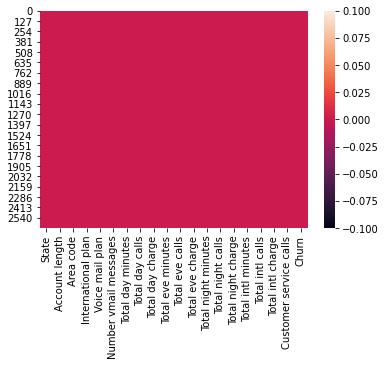

In [ ]:
sb.heatmap(data.isna())

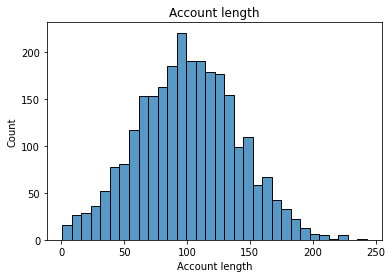

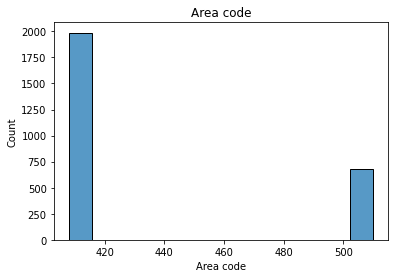

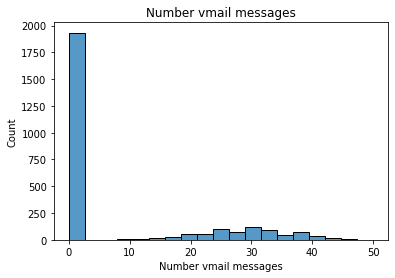

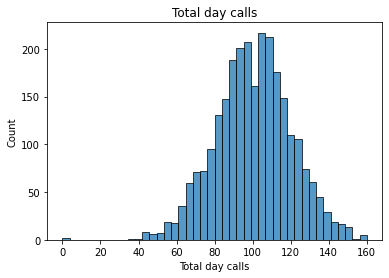

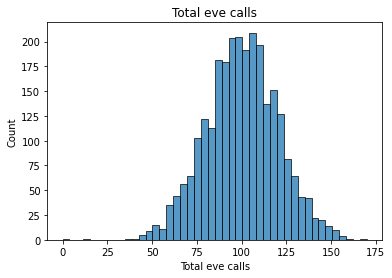

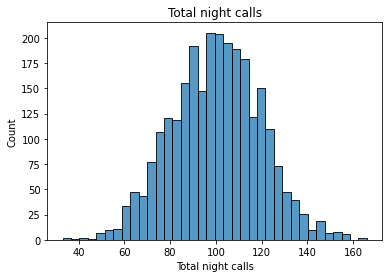

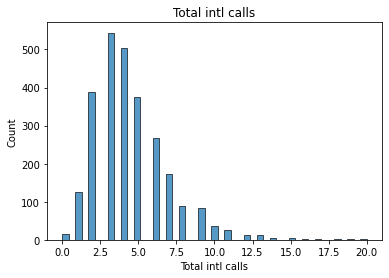

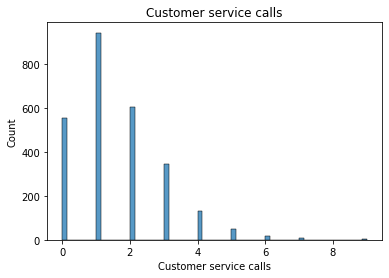

In [ ]:
# Notre dataset est ideal,il a deja été traité nous n'avons pas besoin de traiter les valeurs manquantes
# visualisation des variables continues de type int
for i in data.select_dtypes('int64'):
 plot.figure()
 sb.histplot(data[i])  
 plot.title(i)

   


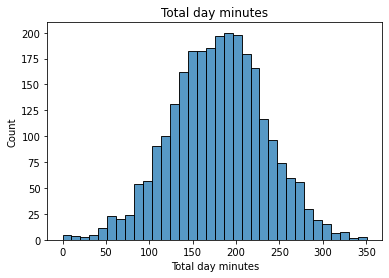

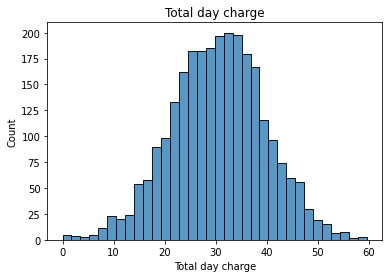

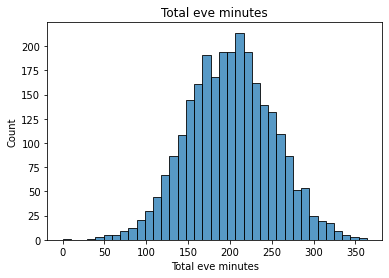

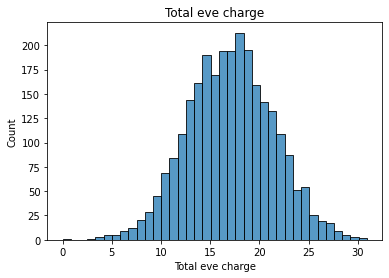

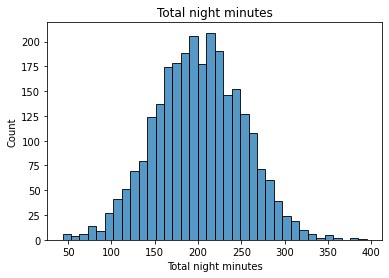

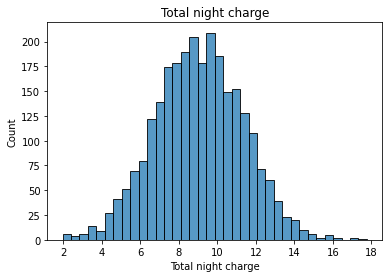

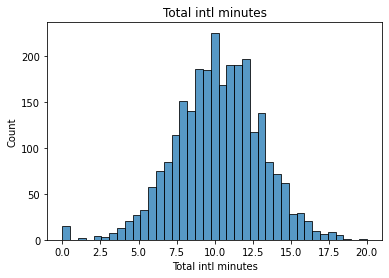

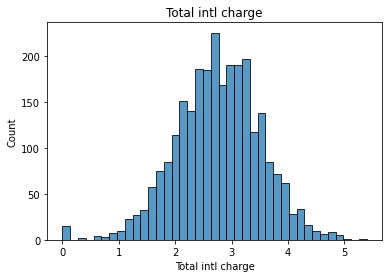

In [ ]:
 # visualisation des variables continues de type int
for i in data.select_dtypes('float64'):
  plot.figure()
  sb.histplot(data[i])  
  plot.title(i)

   

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


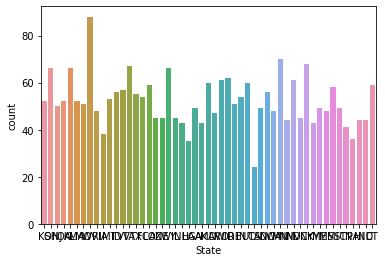

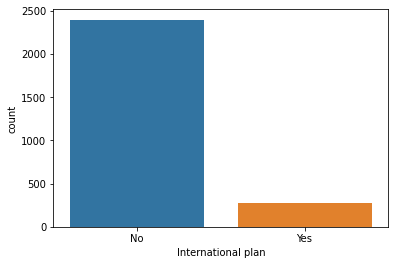

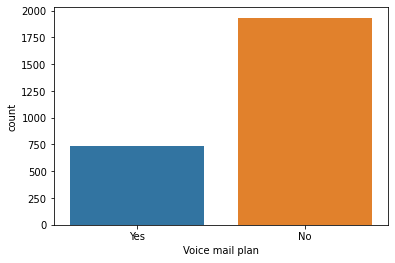

In [ ]:
# visualisation des variables catégorielles 
for i in data.select_dtypes('object'):
 plot.figure()
 sb.countplot(data[i])
 plot.xlabel(i) 

   


In [ ]:
 data["Churn"].value_counts()
 #hypothèse 2:14% résilie l'@ et 86% non.Donc les gens ont tendances à garder leur abonnement

False    2278
True      388
Name: Churn, dtype: int64

In [ ]:
 
##

In [ ]:
#
pd.crosstab(data["Churn"],data["Customer service calls"]) 


Customer service calls,0,1,2,3,4,5,6,7,8,9
Churn,,,,,,,,,,
False,476,846,546,311,69,20,7,3,0,0
True,79,99,62,37,64,29,10,5,1,2


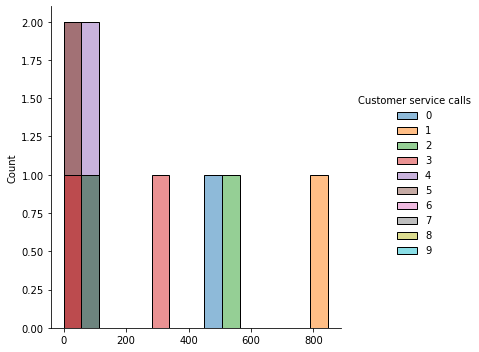

In [ ]:
#Hypothèse3: Parmi ceux qui ne relisient pas leurs contrats on ne trouve aucun qui ai contacté au moins une fois le service client
sb.displot(pd.crosstab(data["Churn"],data["Customer service calls"]) )
    

In [ ]:
# On a max(appel/jr)=108 appels/jours------>environ 225 personnes 
#on a min(appel/jour)=40 appels/jour-------->environ  4 personnes #6 personnes qui ne passent pas d'appel 
#6 personnes qui ne passent pas d'appel 
#On remarque egalement que la distribution de cette variable suit une distribution normale,il existe une fonction analytique
 
data["Total day calls"].var()
#sb.distplot(data["Total day minutes"])

399.52662757621965

In [ ]:
pd.crosstab(data["Total day calls"]>40,data["Churn"])
 

Churn,False,True
Total day calls,,
False,3,1
True,2275,387


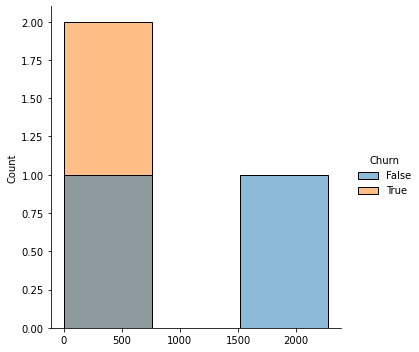

In [ ]:
sb.displot(pd.crosstab(data["Total day calls"]>40,data["Churn"]))

In [ ]:
#Hypothèse4: les abonnés ayant plus de 4 appels/jour ne resilient pas leur abonnement
# Statistiquement nous avons 85% qui ne resilient pas et 20% qui le resilient
#C'est assez logique vu qu'il serait un peu inconsidéré de suspendre un service que l'on utilise quotidiennement 

In [ ]:
data["Total intl calls"].mean()

4.467366841710428

In [ ]:
# on a en moyenne 5 appel international/jour /client

In [ ]:
#A partir de là, on peut essayer de voir comment reagissent les clients qui resilient leur abonnment
# En considérant le nombre moyen d'appel international /jour/client
pd.crosstab(data["Total intl calls"]>4.47,data["Churn"])

Churn,False,True
Total intl calls,,
False,1314,261
True,964,127


<AxesSubplot:xlabel='Total intl calls'>

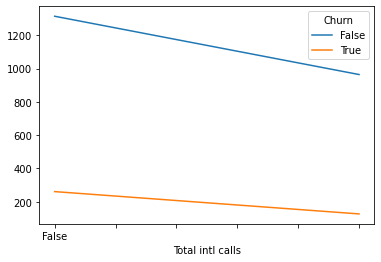

In [ ]:
pd.crosstab(data["Total intl calls"]>4.47,data["Churn"]).plot()

<AxesSubplot:>

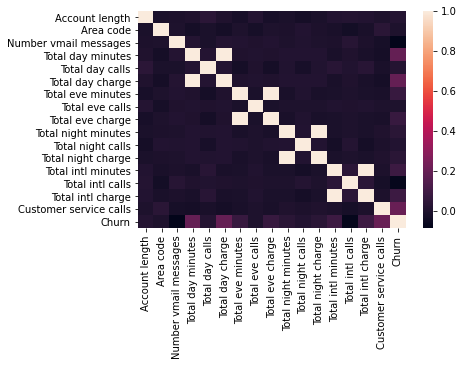

In [ ]:
#Hypothèse5: Parmi Ceux qui ont nbr_apl_international>m=4.47  on a environ  1/9 des personnes qui ne résilient pas
#leur abonnement
#Ca apparait comme on peu plus logique vu que si la personne communique  beaucoup  avec l'international cest qu'elle
#son abonnement lui est très utile donc pourquoi le resilierait elle?
#Visalisation de la matrice de correlation 
sb.heatmap(data.corr())
#Les corellations sont:
#(Total day charge-Total day minutes),(Total eve charge-Total eve minute),(Total night charge-Total night minute)
#(Total intl charge-Total intl minute)

In [ ]:
 ########################################################################## DL PREDICTION ######################################################################""""

In [ ]:
modele= Sequential()
modele.add(Dense(units=8,activation='relu',input_shape=(19,),kernel_initializer='uniform'))
modele.add(Dense(units=8,activation='relu',kernel_initializer='uniform'))
modele.add(Dense(units=8,activation='relu',kernel_initializer='uniform'))
modele.add(Dense(units=1,activation='sigmoid'))
modele.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])
train.dtypes.value_counts()
train.select_dtypes('object')
for i in train.select_dtypes('object'):
  train[i]=len(train[i])
 

In [ ]:
 
xtrain=train.drop("Churn",axis=1)
xtest=test.drop("Churn",axis=1)
ytrain=train["Churn"]
ytest=test["Churn"]

In [ ]:

xtrain,xtest= normalisation(xtrain,xtest)
xtrain.shape


(667, 19)

In [ ]:
modele.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 160       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


In [ ]:
 modele.fit(xtrain,ytrain,epochs=100)


Epoch 1/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2130 - accuracy: 0.9220
Epoch 2/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2136 - accuracy: 0.9175
Epoch 3/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2132 - accuracy: 0.9235
Epoch 4/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2139 - accuracy: 0.9175
Epoch 5/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2139 - accuracy: 0.9070
Epoch 6/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2149 - accuracy: 0.9130
Epoch 7/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2147 - accuracy: 0.9190
Epoch 8/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2112 - accuracy: 0.9205
Epoch 9/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2117 - accuracy: 0.9190
Epoch 10/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2123 - accuracy: 0.9190
Epoch 11/

In [ ]:
  modele.evaluate(xtest,ytest)
  yp=modele.predict_classes(xtest)


21/21 [==============================] - 0s 1ms/step - loss: 0.1940 - accuracy: 0.9265


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
tab=[]
for i in yp:
  for j in i:
     
    tab.append(i)


In [ ]:
 ypredict=pd.Series(tab)

In [ ]:
 result=pd.DataFrame({"y":ytest,"ypredit":ypredict})

In [ ]:
 print(result.head(60))


        y ypredit
0   False     [0]
1    True     [1]
2    True     [1]
3   False     [0]
4   False     [0]
5   False     [0]
6   False     [0]
7    True     [1]
8   False     [0]
9   False     [0]
10  False     [0]
11  False     [0]
12  False     [0]
13  False     [0]
14   True     [0]
15  False     [0]
16   True     [1]
17  False     [0]
18  False     [0]
19  False     [0]
20  False     [0]
21  False     [0]
22  False     [0]
23  False     [0]
24  False     [0]
25  False     [0]
26  False     [0]
27  False     [0]
28  False     [0]
29  False     [0]
30  False     [0]
31  False     [0]
32  False     [0]
33  False     [1]
34  False     [0]
35   True     [1]
36  False     [0]
37  False     [0]
38  False     [0]
39  False     [0]
40  False     [0]
41   True     [1]
42  False     [0]
43  False     [1]
44  False     [0]
45  False     [0]
46  False     [1]
47   True     [0]
48  False     [0]
49  False     [0]
50  False     [0]
51  False     [1]
52   True     [0]
53  False     [0]
54  False 